# Day and Night Image Classifier

The day/night image dataset consists of 200 RGB color images in two categories: day and night. There are equal numbers of each example: 100 day images and 100 night images.

A classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images。

In [22]:
# import resources
import cv2 # computer vision library
import helpers

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

### Training and Testing Data
The 200 day/night images are separated into training and testing datasets. 

* 60% of these images are training images, for you to use as you create a classifier.
* 40% are test images, which will be used to test the accuracy of your classifier.

In [23]:
# Create directories for training image data
image_dir_training = "images/day_night_images/training/"

# NOT "Image Processing/images/day_night_images/training/"

# Create directories for test image data
image_dir_test = "images/day_night_images/test/"

### Load the datasets

These first few lines of code will load the training day/night images and store all of them in a variable, `IMAGE_LIST`. This list contains the images and their associated label ("day" or "night"). 

For example, the first image-label pair in `IMAGE_LIST` can be accessed by index: 
``` IMAGE_LIST[0][:]```.

In [24]:
# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = helpers.load_dataset(image_dir_training) # a list of tuples
print('Number of images:', len(IMAGE_LIST))
print(IMAGE_LIST[0][0].shape) # image
print(IMAGE_LIST[0][1]) # label

Number of images: 240
(458, 800, 3)
day


### Visualize the input images

Shape: (458, 800, 3)
Label: day


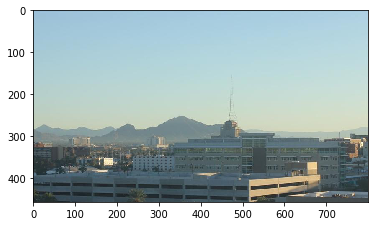

In [25]:
# Select an image and its label by list index
image_index = 0
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]

# Display image and data about it
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label: " + str(selected_label))

### Pre-process the input data

(600, 1100, 3)

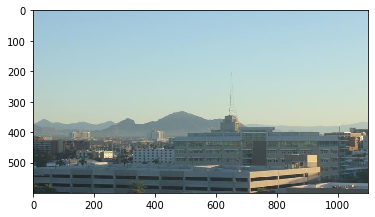

In [26]:
# This function should take in an RGB image and return a new, standardized version
def standardize_input(image):
    
    ## TODO: Resize image so that all "standard" images are the same size 600x1100 (hxw) 
    #standard_im = []
    dim = (1100, 600) # height x width
    standard_im = cv2.resize(image, dim)
    return standard_im

resized = standardize_input(selected_image)
plt.imshow(resized)
resized.shape

### Standarize the output with binary encoding
With each loaded image, specify the expected output. 
Use binary numerical values 0/1 = night/day.

In [27]:
# encode("day") should return: 1
# encode("night") should return: 0

def encode(label):
        
    if label == "day":
        return 1
    elif label == "night":
        return 0

### Construct a `STANDARDIZED_LIST` of input images and output labels.

In [28]:
def standardize(image_list):
    standard_list = []
    for item in image_list:
        image = item[0]
        label = item[1]

        # Standardize the image
        standardized_im = standardize_input(image)

        # Create a numerical label
        binary_label = encode(label)    

        # Append the image
        standard_list.append((standardized_im, binary_label))
        
    return standard_list

# Standardize all training images
STANDARDIZED_LIST = standardize(IMAGE_LIST)

### Visualize the standardized data

Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 1


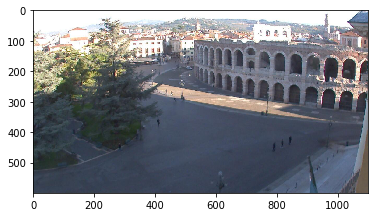

In [29]:
# Display a standardized image and its label

# Select an image by index
image_num = 50
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

# Display image and data about it
## TODO: Make sure the images have numerical labels and are of the same size
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))